In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os

from glob import glob

from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Get data and do some reorganizing

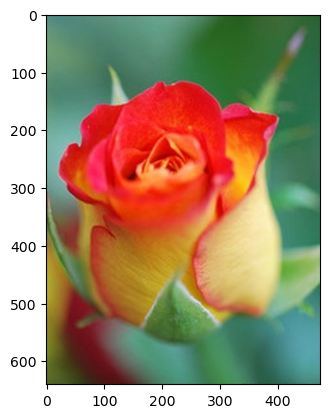

In [3]:
# look at some images
plt.imshow(image.load_img('training/0_808.jpg'))
plt.show()

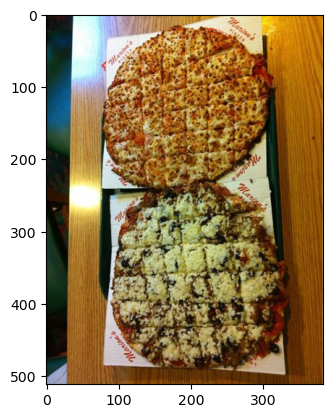

In [4]:
# food images start with 1, non-food images start with 0
plt.imshow(image.load_img('training/1_616.jpg'))
plt.show()

In [5]:
!mkdir data

A subdirectory or file data already exists.


In [6]:
# make directories to store the data Keras-style
!mkdir data\train
!mkdir data\test
!mkdir data\train\nonfood
!mkdir data\train\food
!mkdir data\test\nonfood
!mkdir data\test\food

A subdirectory or file data\train already exists.
A subdirectory or file data\test already exists.
A subdirectory or file data\train\nonfood already exists.
A subdirectory or file data\train\food already exists.
A subdirectory or file data\test\nonfood already exists.
A subdirectory or file data\test\food already exists.


In [14]:
# move the images
# Note: we will consider 'training' to be the train set
#       'validation' folder will be the test set
#       ignore the 'evaluation' set
!move training\0*.jpg data\train\nonfood
!move training\1*.jpg data\train\food
!move validation\0*.jpg data\test\nonfood
!move validation\1*.jpg data\test\food

C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\training\0_0.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\training\0_1.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\training\0_10.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\training\0_100.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\training\0_1000.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\training\0_1001.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\training\0_1002.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\training\0_1003.jpg
C:\Users\Asus\Documents\tensorflo

C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\training\1_0.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\training\1_1.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\training\1_10.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\training\1_100.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\training\1_1000.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\training\1_1001.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\training\1_1002.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\training\1_1003.jpg
C:\Users\Asus\Documents\tensorflo

C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\validation\0_0.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\validation\0_1.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\validation\0_10.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\validation\0_100.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\validation\0_101.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\validation\0_102.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\validation\0_103.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\validation\0_104.jpg
C:\Users\Asus\Documen

C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\validation\1_0.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\validation\1_1.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\validation\1_10.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\validation\1_100.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\validation\1_101.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\validation\1_102.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\validation\1_103.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\validation\1_104.jpg
C:\Users\Asus\Documen

In [4]:
train_path = 'data/train'
valid_path = 'data/test'

In [5]:
# load images in to the same smaller size
IMAGE_SIZE = [200, 200]

In [6]:
# useful for getting number of files
image_files = glob(train_path + '/*/*.jpg')
valid_image_files = glob(valid_path + '/*/*.jpg')

In [7]:
image_files

['data/train\\food\\1_0.jpg',
 'data/train\\food\\1_1.jpg',
 'data/train\\food\\1_10.jpg',
 'data/train\\food\\1_100.jpg',
 'data/train\\food\\1_1000.jpg',
 'data/train\\food\\1_1001.jpg',
 'data/train\\food\\1_1002.jpg',
 'data/train\\food\\1_1003.jpg',
 'data/train\\food\\1_1004.jpg',
 'data/train\\food\\1_1005.jpg',
 'data/train\\food\\1_1006.jpg',
 'data/train\\food\\1_1007.jpg',
 'data/train\\food\\1_1008.jpg',
 'data/train\\food\\1_1009.jpg',
 'data/train\\food\\1_101.jpg',
 'data/train\\food\\1_1010.jpg',
 'data/train\\food\\1_1011.jpg',
 'data/train\\food\\1_1012.jpg',
 'data/train\\food\\1_1013.jpg',
 'data/train\\food\\1_1014.jpg',
 'data/train\\food\\1_1015.jpg',
 'data/train\\food\\1_1016.jpg',
 'data/train\\food\\1_1017.jpg',
 'data/train\\food\\1_1018.jpg',
 'data/train\\food\\1_1019.jpg',
 'data/train\\food\\1_102.jpg',
 'data/train\\food\\1_1020.jpg',
 'data/train\\food\\1_1021.jpg',
 'data/train\\food\\1_1022.jpg',
 'data/train\\food\\1_1023.jpg',
 'data/train\\food\\1

In [8]:
# useful for getting number of classes
folders = glob(train_path + '/*')
folders

['data/train\\food', 'data/train\\nonfood']

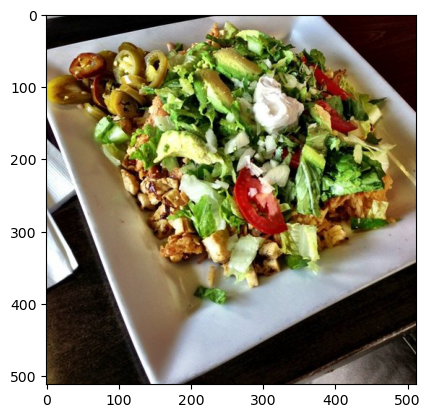

In [9]:
# look at an image for fun
plt.imshow(image.load_img(np.random.choice(image_files)))
plt.show()

## Create model from pretrained VGG16

In [10]:
# load pretrained VGG16 model with pre-trained weights on imagenet dataset
# DO NOT include the top 3 layers of the network -> include_top = False
ptm = VGG16(input_shape=IMAGE_SIZE + [3],
           weights='imagenet',
           include_top=False)

In [11]:
# freeze pretrained model weights
ptm.trainable = False

In [12]:
# map the data into feature vectors
# Keras image data generator returns classes one-hot encoded

K = len(folders)   # number of classes
x = Flatten()(ptm.output)
x = Dense(K, activation='softmax')(x)

In [13]:
# create a model object
model = Model(inputs=ptm.input, outputs=x)

In [14]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

## Preprocess data with ImageDataGenerator

In [15]:
# create an instance of ImageDataGenerator
# for training data: apply some options for data augmentation
gen_train = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              preprocessing_function=preprocess_input)

# for test data, only preprocess_input as the preprocessing_function is needed
gen_test = ImageDataGenerator(preprocessing_function=preprocess_input)

In [16]:
BATCH_SIZE = 128

# create generators
train_generator = gen_train.flow_from_directory(directory=train_path,
                                               target_size=IMAGE_SIZE,
                                               shuffle=True,
                                               batch_size=BATCH_SIZE)

valid_generator = gen_test.flow_from_directory(directory=valid_path,
                                              target_size=IMAGE_SIZE,
                                              batch_size=BATCH_SIZE)

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Compile and train model

In [17]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [18]:
r = model.fit_generator(generator=train_generator,
                       validation_data=valid_generator,
                       epochs=10,
                       steps_per_epoch=int(np.ceil(len(image_files) / BATCH_SIZE)),
                       validation_steps=int(np.ceil(len(valid_image_files) / BATCH_SIZE)))

C:\Users\Asus\AppData\Local\Temp\ipykernel_3016\1672146448.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(generator=train_generator,


Epoch 1/10
24/24 [==============================] - 600s 25s/step - loss: 1.6800 - accuracy: 0.9200 - val_loss: 0.6038 - val_accuracy: 0.9730
Epoch 2/10
24/24 [==============================] - 591s 25s/step - loss: 0.5269 - accuracy: 0.9753 - val_loss: 0.6258 - val_accuracy: 0.9760
Epoch 3/10
24/24 [==============================] - 593s 25s/step - loss: 0.3354 - accuracy: 0.9803 - val_loss: 0.9168 - val_accuracy: 0.9710
Epoch 4/10
24/24 [==============================] - 589s 25s/step - loss: 0.2795 - accuracy: 0.9873 - val_loss: 0.8064 - val_accuracy: 0.9700
Epoch 5/10
24/24 [==============================] - 601s 25s/step - loss: 0.2265 - accuracy: 0.9880 - val_loss: 0.9101 - val_accuracy: 0.9640
Epoch 6/10
24/24 [==============================] - 592s 25s/step - loss: 0.1568 - accuracy: 0.9877 - val_loss: 0.5517 - val_accuracy: 0.9780
Epoch 7/10
24/24 [==============================] - 586s 24s/step - loss: 0.1644 - accuracy: 0.9893 - val_loss: 0.6229 - val_accuracy: 0.9830
Epoch 

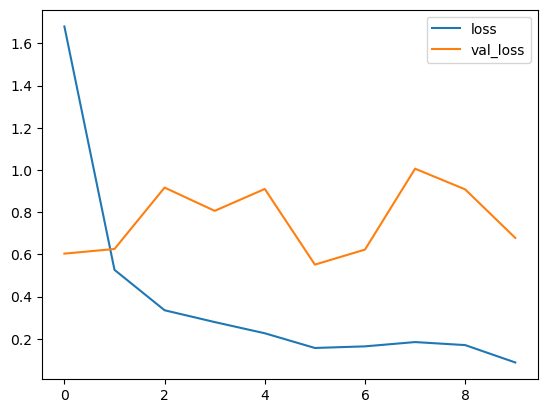

In [19]:
# plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [21]:
# create a 2nd train generator which does not use data augmentation
# to get the true train accuracy
train_generator2 = gen_test.flow_from_directory(
  train_path,
  target_size=IMAGE_SIZE,
  batch_size=BATCH_SIZE,
)
model.evaluate_generator(
    train_generator2,
    steps=int(np.ceil(len(image_files) / BATCH_SIZE)))

Found 3000 images belonging to 2 classes.


C:\Users\Asus\AppData\Local\Temp\ipykernel_3016\1779197070.py:8: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(


[0.07057198882102966, 0.9973333477973938]

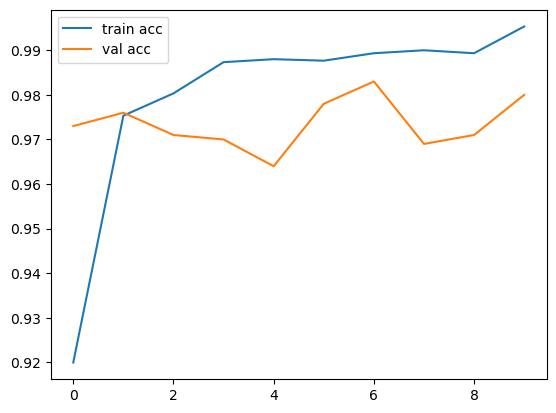

In [22]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [23]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

In [24]:
model.save('transfer_learning_data_augmentation.h5')